# 1. 이론 주관식


### 1.과적합(overfitting) 이란?

### 2. 과적합을 개선하기 위한 방법 한가지 이상

### 3. Imbalanced 분포도를 가진 레이블 데이터 집합에서 사용하는 검증 방법을 찾고 그 방법을 간단하게 설명하시오.

### 4. Data Prepocessing (데이터 전처리)에서 인코딩(encoding)을 하는 이유

### 5. One-hot encoding의 단점

### 6. 데이터의 스케일링 변환시 유의해야할 점

# 2. Coding part

Heart Failure Prediction의 자료를 다운 받고 이 자료를 이용하여 death event를 예측 해보기

자료는 assignment를 위해서 조금 수정하였기에 제공된 파일 사용하기

자료 설명 (안 읽어도 됨)

Heart Failure Prediction
12 clinical features for predicting death events.

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

출처 : https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


### 1. 데이터 불러오기

저는 코랩을 사용해서 구글드라이브에서 아래처럼 파일을 불러왔는데, 각자 사용하는 프로그램에 따라서 파일을 불러오기만 하면 됩니다!

In [275]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heart_df = pd.read_csv('./drive/MyDrive/Colab_Notebooks/heart_failure_clinical_records_dataset.csv')
[                ]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,N,4.0,1
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,N,6.0,1
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,Y,7.0,1


In [ ]:
print('\n ### train 데이터 정보 ###  \n')
[                  ]

### 2. 결손 데이터 확인

In [278]:
print('데이터 세트 Null 값 갯수 ', [            ])

데이터 세트 Null 값 갯수  age                         18
anaemia                      0
creatinine_phosphokinase     1
diabetes                     0
ejection_fraction            7
high_blood_pressure          0
platelets                    5
serum_creatinine             2
serum_sodium                 3
sex                          0
smoking                      0
time                         4
DEATH_EVENT                  0
dtype: int64


In [279]:
heart_df['age'].fillna(heart_df['age'].mean(),inplace=True)
[                                                       
                                                       
                                                       
                                                       
      
                                                        ]
print('데이터 세트 Null 값 갯수 ',covid_df.isnull().sum())

데이터 세트 Null 값 갯수  age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


### 3. 나이, 성별, 흡연여부로 다양하게 분포 파악해보기

In [280]:
print(' Sex 값 분포 :\n', heart_df['sex'].value_counts())
[
  
                                                        ]

 Sex 값 분포 :
 1    194
0    105
Name: sex, dtype: int64

 age 값 분포 :
 60.000000    30
50.000000    25
70.000000    25
65.000000    24
60.827996    18
55.000000    17
45.000000    17
75.000000    10
58.000000    10
53.000000     9
72.000000     7
40.000000     7
42.000000     7
80.000000     7
63.000000     6
85.000000     6
62.000000     5
52.000000     5
49.000000     4
61.000000     4
59.000000     4
68.000000     4
51.000000     4
73.000000     4
64.000000     3
69.000000     3
82.000000     3
48.000000     2
95.000000     2
90.000000     2
57.000000     2
66.000000     2
46.000000     2
67.000000     2
54.000000     2
44.000000     2
77.000000     2
47.000000     1
78.000000     1
81.000000     1
94.000000     1
43.000000     1
56.000000     1
86.000000     1
87.000000     1
79.000000     1
41.000000     1
60.667000     1
Name: age, dtype: int64

 smoking 값 분포 :
 N    203
Y     96
Name: smoking, dtype: int64


In [281]:
[                                                  ]

sex  DEATH_EVENT
0    0               71
     1               34
1    0              132
     1               62
Name: sex, dtype: int64

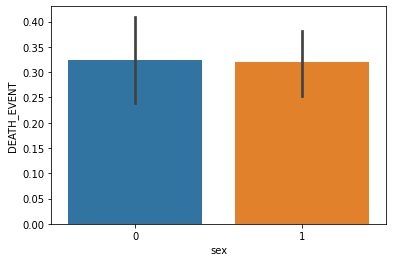

In [282]:
sns.barplot(x='sex', y = 'DEATH_EVENT', data=heart_df)

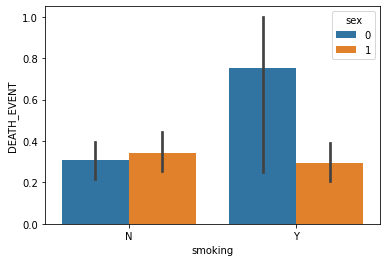

In [264]:
[                                                 ]

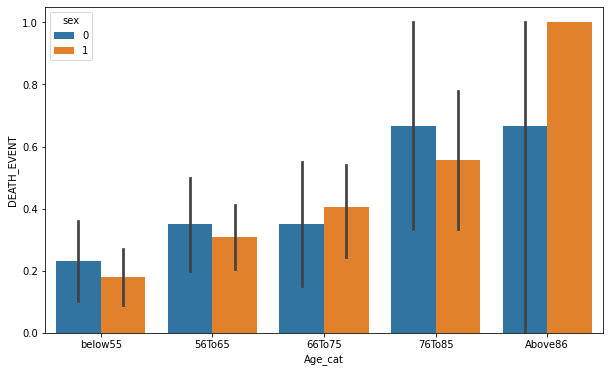

In [283]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= 55: cat = 'below55'
    elif age <= 65: cat = '56To65'
    elif age <= 75: cat = '66To75'
    elif age <= 85: cat = '76To85'
    else : cat = 'Above86'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['below55', '56To65', '66To75', '76To85', 'Above86']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
heart_df['Age_cat'] = heart_df['age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='DEATH_EVENT', hue='sex', data=heart_df, order=group_names)
heart_df.drop('Age_cat', axis=1, inplace=True)

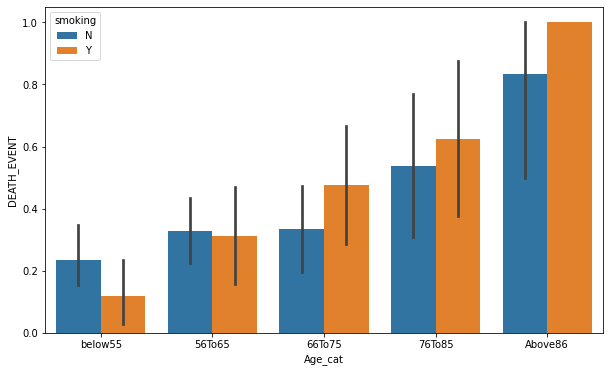

In [284]:
[
  
                                                        ]

### 4. 데이터 전처리

In [285]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['smoking']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

heart_df = encode_features(heart_df)
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,0,4.0,1
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,0,6.0,1
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,1,7.0,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137.0,1,0,7.0,1
4,65.0,1,160.0,1,20.0,0,327000.00,2.7,116.0,0,0,8.0,1


### 5. Null 처리 & 불필요 feature 제거 & 레이블 인코딩 & 새로 호출

In [286]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
     df['age'].fillna(df['age'].mean(),inplace=True)
     [
  
                                                        ]
     return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['time'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    features = ['smoking']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df): 
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


### 6. 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 

In [287]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
heart_df = pd.read_csv('./drive/MyDrive/Colab_Notebooks/heart_failure_clinical_records_dataset.csv')
y_heart_df = heart_df['DEATH_EVENT']
X_heart_df= heart_df.drop('DEATH_EVENT',axis=1)
X_heart_df = transform_features(X_heart_df)

In [288]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_heart_df, y_heart_df, 
                                                  test_size=0.3, random_state=2021)

### 7. 결정트리, Random Forest, 로지스틱 회귀로 데이터를 학습시키고 각 classifier에서 정확도 도출

In [289]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=2021)
rf_clf = RandomForestClassifier(random_state=2021)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
[
  
                                                        ]

# RandomForestClassifier 학습/예측/평가
[
  
                                                        ]

# LogisticRegression 학습/예측/평가
[
  
                                                        ]

DecisionTreeClassifier 정확도: 0.7333
RandomForestClassifier 정확도:0.7667
LogisticRegression 정확도: 0.7667


### 8. KFold 이용 (fold = 5)

In [290]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_heart_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_heart_df.values[train_index], X_heart_df.values[test_index]
        y_train, y_test = y_heart_df.values[train_index], y_heart_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        [
  
                                                        ] 
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5)

교차 검증 0 정확도: 0.2833
교차 검증 1 정확도: 0.6333
교차 검증 2 정확도: 0.7333
교차 검증 3 정확도: 0.6833
교차 검증 4 정확도: 0.7288
평균 정확도: 0.6124


### 9. cross_val_score 사용

In [291]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_heart_df , y_heart_df , cv=5)
[
  
                                                        ]

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.6833
교차 검증 1 정확도: 0.7333
교차 검증 2 정확도: 0.7000
교차 검증 3 정확도: 0.6833
교차 검증 4 정확도: 0.6441
평균 정확도: 0.6888


### 10. GridSearchCV를 이용해서 최적의 hyper-parameter를 구하고 최고의 정확도 구해보기

In [292]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

[
  
                                                        ]

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7179
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.7556
